<a href="https://colab.research.google.com/github/SalshaGeona/221230059-Pengantar-ML/blob/main/week-02/latihan_praktikum_1_list_dictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== RETAIL DATA ANALYSIS ===

1. Revenue per Product:
product_id
8     32062.915807
9     30812.566464
7     30786.212454
5     29894.628309
6     29771.241361
2     28433.373576
3     27360.489903
10    25146.428705
1     24953.204554
4     23950.525430
Name: revenue, dtype: float64 

2. Top 5 Customers by Spending:
customer_id
38    5239.536260
59    5185.221233
89    4759.149270
94    4690.528278
15    4657.289888
Name: revenue, dtype: float64 

3. Daily Revenue (first 10 days):
date
2023-01-01    5268.121555
2023-01-02    4656.102661
2023-01-03    3226.578585
2023-01-04    2462.071219
2023-01-05    3741.645829
2023-01-06    2617.910977
2023-01-07    2503.241611
2023-01-08    5032.490882
2023-01-09    4344.183819
2023-01-10    1700.299375
Name: revenue, dtype: float64 

4. Quantity Anomalies detected: 0
Anomalies sample:
Empty DataFrame
Columns: [date, product_id, quantity, price, customer_id, revenue, quantity_zscore]
Index: [] 

=== BONUS ANALYSIS ===

Monthly Revenue:
month
1    

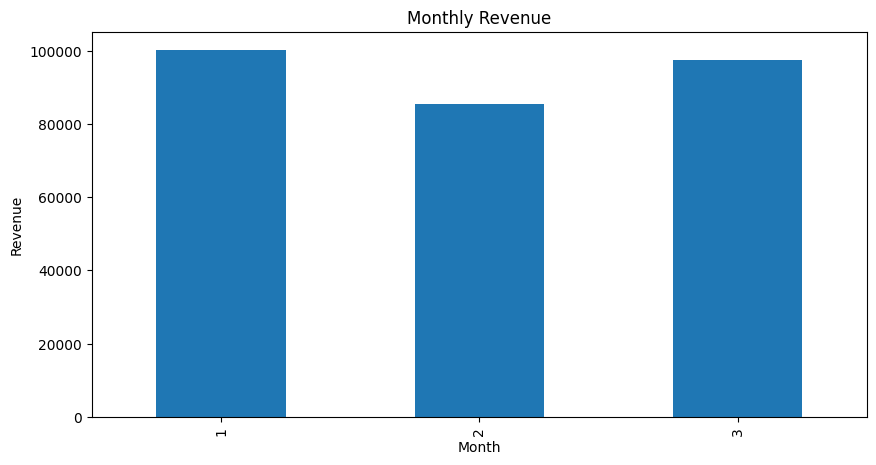

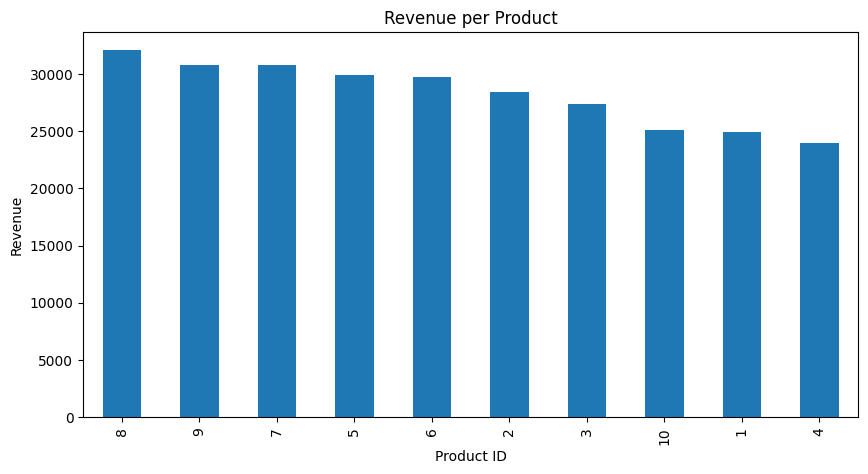

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === RETAIL DATA ANALYSIS ===

# Buat dataset simulasi
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-03-31', freq='D')
retail_data = pd.DataFrame({
    'date': np.random.choice(dates, 1000),
    'product_id': np.random.randint(1, 11, 1000),
    'quantity': np.random.randint(1, 10, 1000),
    'price': np.random.uniform(10, 100, 1000),
    'customer_id': np.random.randint(1, 101, 1000)
})
retail_data['revenue'] = retail_data['quantity'] * retail_data['price']

# 1. Revenue per Product
revenue_per_product = (
    retail_data.groupby('product_id')['revenue']
    .sum()
    .sort_values(ascending=False)
)

# 2. Top 5 Customers by Spending
top_customers = (
    retail_data.groupby('customer_id')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# 3. Daily Revenue
daily_revenue = (
    retail_data.groupby('date')['revenue']
    .sum()
    .sort_index()
)

# 4. Quantity Anomalies Detection (pakai Z-score)
def detect_quantity_anomalies(df, threshold=2):
    mean_q = df['quantity'].mean()
    std_q = df['quantity'].std()
    df['quantity_zscore'] = (df['quantity'] - mean_q) / std_q
    anomalies = df[np.abs(df['quantity_zscore']) > threshold]
    return anomalies

anomalies = detect_quantity_anomalies(retail_data)

# === BONUS ANALYSIS ===

# Monthly revenue
retail_data['month'] = retail_data['date'].dt.month
monthly_revenue = (
    retail_data.groupby('month')['revenue']
    .sum()
    .sort_index()
)

# Customer statistics (revenue sum, mean, count, avg quantity)
customer_stats = retail_data.groupby('customer_id').agg({
    'revenue': ['sum', 'mean', 'count'],
    'quantity': 'mean'
})

# === MANIPULASI TAMBAHAN ===

# 5. Produk dengan penjualan terbanyak (berdasarkan quantity)
top_products_qty = (
    retail_data.groupby('product_id')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# 6. Rata-rata harga per produk
avg_price_per_product = (
    retail_data.groupby('product_id')['price']
    .mean()
    .sort_values(ascending=False)
)

# 7. Korelasi quantity dan revenue
correlation = retail_data[['quantity', 'revenue']].corr().iloc[0, 1]

# === OUTPUT ===
print("=== RETAIL DATA ANALYSIS ===\n")

print("1. Revenue per Product:")
print(revenue_per_product, "\n")

print("2. Top 5 Customers by Spending:")
print(top_customers, "\n")

print("3. Daily Revenue (first 10 days):")
print(daily_revenue.head(10), "\n")

print(f"4. Quantity Anomalies detected: {len(anomalies)}")
print("Anomalies sample:")
print(anomalies.head(), "\n")

print("=== BONUS ANALYSIS ===")
print("\nMonthly Revenue:")
print(monthly_revenue)

print("\nCustomer Statistics:")
print(customer_stats.head(5))  # tampilkan 5 customer pertama

print("\n=== MANIPULASI TAMBAHAN ===")
print("\n5. Top 5 Products by Quantity Sold:")
print(top_products_qty)

print("\n6. Average Price per Product:")
print(avg_price_per_product)

print(f"\n7. Correlation between Quantity and Revenue: {correlation:.4f}")

# === VISUALISASI ===
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar', title="Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(10,5))
revenue_per_product.plot(kind='bar', title="Revenue per Product")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.show()
